In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv('sorted_waste.csv')

In [4]:
df.head()

,Unnamed: 0,date,public_litter_bins,dumped_rubbish,month,Total waste,No of Events,Carlton,Docklands,East Melbourne,...,North Melbourne,Parkville,Port Melbourne,South Bank,South Yarra,West Melbourne,Melbourne,Average Rainfall (mm),Average Temperature (Degree Celsius),Average Wind (in mph)
0,0,2015-01-01,328.79,147.72,January,476.51,1,0,0,0,...,0,0,0,0,0,0,1,44.2,26.0,10.0
1,1,2015-02-01,365.13,179.25,February,544.38,6,0,1,1,...,0,1,0,0,0,0,2,50.2,25.8,9.8
2,2,2015-03-01,417.03,190.92,March,607.95,10,1,1,5,...,1,0,1,0,0,0,1,39.0,23.9,9.7
3,3,2015-04-01,346.64,200.12,April,546.76,7,1,1,1,...,1,0,0,1,1,0,0,53.2,20.3,8.6
4,4,2015-05-01,344.11,228.42,May,572.53,8,1,1,2,...,0,1,0,1,1,1,0,43.9,16.7,8.7


In [5]:
df = df.drop(columns={'Unnamed: 0'})

In [6]:
df

,date,public_litter_bins,dumped_rubbish,month,Total waste,No of Events,Carlton,Docklands,East Melbourne,Kensington and Flemington,North Melbourne,Parkville,Port Melbourne,South Bank,South Yarra,West Melbourne,Melbourne,Average Rainfall (mm),Average Temperature (Degree Celsius),Average Wind (in mph)
0,2015-01-01,328.79,147.72,January,476.51,1,0,0,0,0,0,0,0,0,0,0,1,44.2,26.0,10.0
1,2015-02-01,365.13,179.25,February,544.38,6,0,1,1,1,0,1,0,0,0,0,2,50.2,25.8,9.8
2,2015-03-01,417.03,190.92,March,607.95,10,1,1,5,0,1,0,1,0,0,0,1,39.0,23.9,9.7
3,2015-04-01,346.64,200.12,April,546.76,7,1,1,1,1,1,0,0,1,1,0,0,53.2,20.3,8.6
4,2015-05-01,344.11,228.42,May,572.53,8,1,1,2,0,0,1,0,1,1,1,0,43.9,16.7,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019-11-01,334.60,89.04,November,423.64,3,1,0,0,1,0,0,0,0,0,1,0,39.8,21.8,9.4
59,2019-12-01,354.56,89.20,December,443.76,4,0,0,4,0,0,0,0,0,0,0,0,47.0,23.2,9.9
60,2020-01-01,379.94,99.44,January,479.38,3,0,1,1,0,0,0,0,1,0,0,0,54.5,26.1,10.0
61,2020-02-01,257.94,75.08,February,333.02,3,1,0,0,1,0,0,0,0,0,1,0,59.0,25.7,9.8


In [33]:
df['date']=pd.to_datetime(df['date'])

In [34]:
newdata = df.set_index('date')
newdata.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [35]:
df =df.sort_values(by='date')

In [12]:
#y = df['Total waste'].resample('MS').mean()

In [36]:
newdf=pd.DataFrame()
newdf['date']=df['date']
newdf['Total waste'] =df['Total waste']

In [37]:
newdf.set_index('date',inplace=True)

In [38]:
newdf.head()

,Total waste
date,
2015-01-01,476.51
2015-02-01,544.38
2015-03-01,607.95
2015-04-01,546.76
2015-05-01,572.53


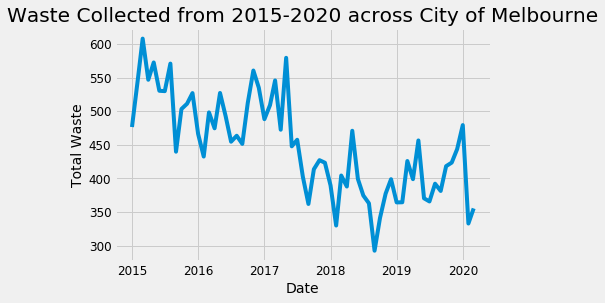

In [39]:
plt.xlabel('Date')
plt.ylabel('Total Waste')
plt.title('Waste Collected from 2015-2020 across City of Melbourne')
plt.plot(newdf)

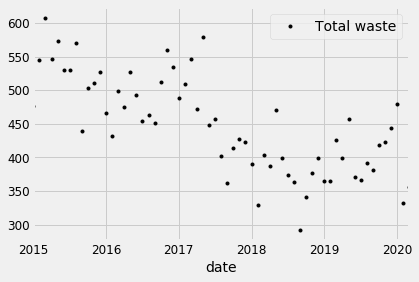

In [40]:
newdf.plot(style='k.')
plt.show()

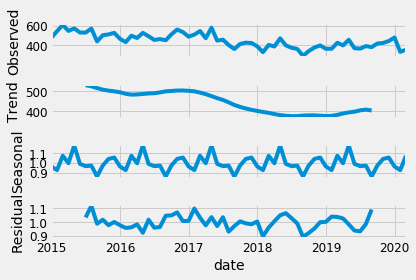

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(newdf, model='multiplicative')
result.plot()
plt.show()

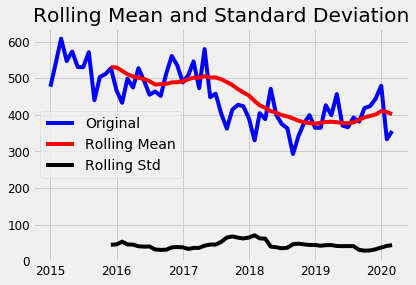

Results of dickey fuller test
Test Statistics                -1.494085
p-value                         0.536435
No. of lags used                4.000000
Number of observations used    58.000000
critical value (1%)            -3.548494
critical value (5%)            -2.912837
critical value (10%)           -2.594129
dtype: float64


In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Total waste'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(newdf)

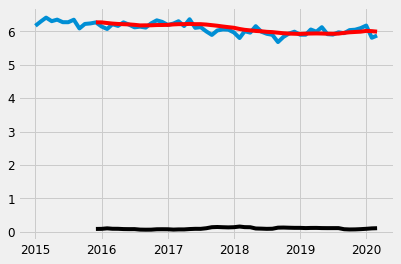

In [43]:
df_log = np.log(newdf)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [44]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

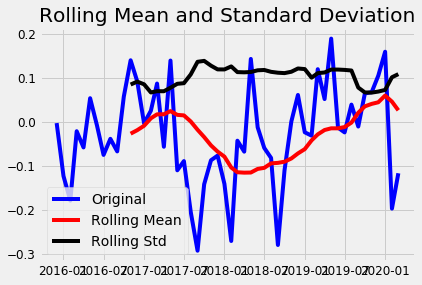

Results of dickey fuller test
Test Statistics                -4.453191
p-value                         0.000239
No. of lags used                0.000000
Number of observations used    51.000000
critical value (1%)            -3.565624
critical value (5%)            -2.920142
critical value (10%)           -2.598015
dtype: float64


In [45]:
test_stationarity(df_log_moving_avg_diff)

In [46]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

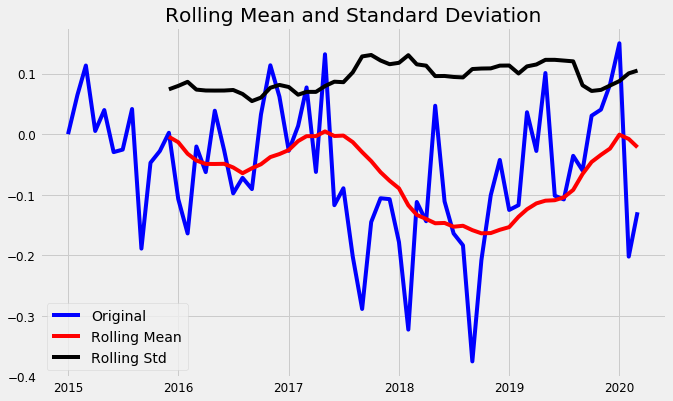

Results of dickey fuller test
Test Statistics                -2.140105
p-value                         0.228697
No. of lags used                4.000000
Number of observations used    58.000000
critical value (1%)            -3.548494
critical value (5%)            -2.912837
critical value (10%)           -2.594129
dtype: float64


In [48]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

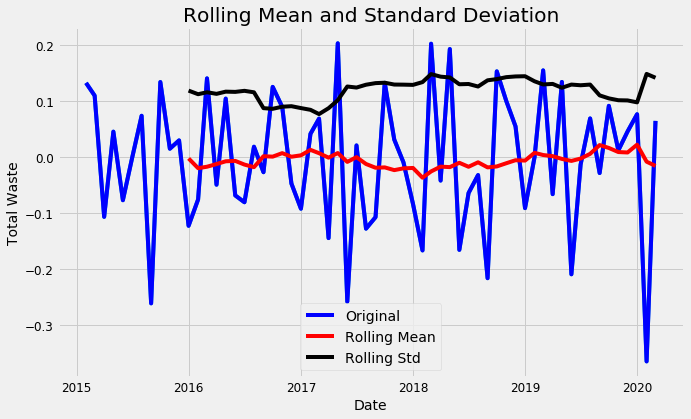

Results of dickey fuller test
Test Statistics               -7.274491e+00
p-value                        1.557249e-10
No. of lags used               3.000000e+00
Number of observations used    5.800000e+01
critical value (1%)           -3.548494e+00
critical value (5%)           -2.912837e+00
critical value (10%)          -2.594129e+00
dtype: float64


In [50]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Total Waste")
plt.plot(df_log_diff)#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

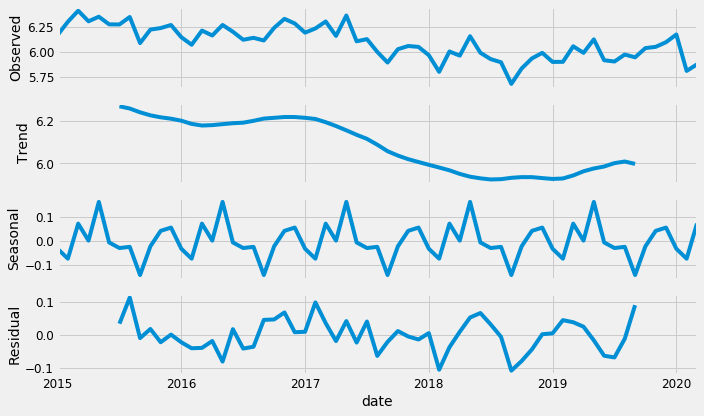

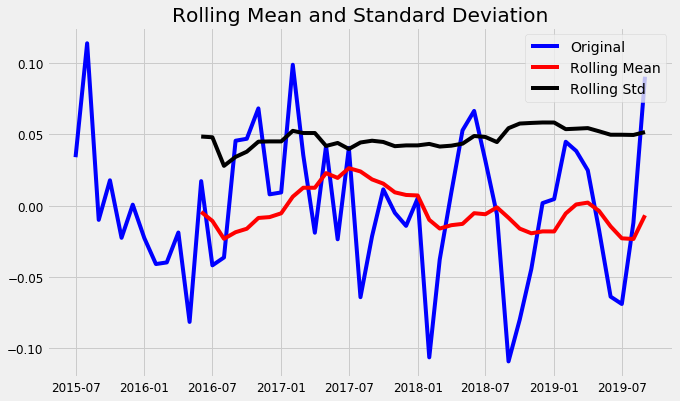

Results of dickey fuller test
Test Statistics                -3.771205
p-value                         0.003216
No. of lags used               11.000000
Number of observations used    39.000000
critical value (1%)            -3.610400
critical value (5%)            -2.939109
critical value (10%)           -2.608063
dtype: float64


In [55]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

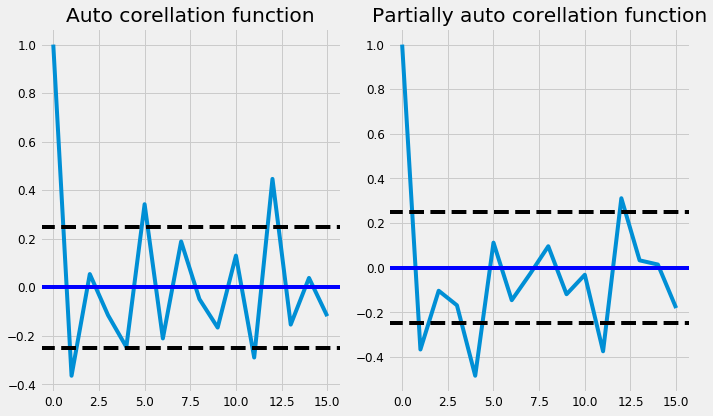

In [56]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

RSS : 0.675971


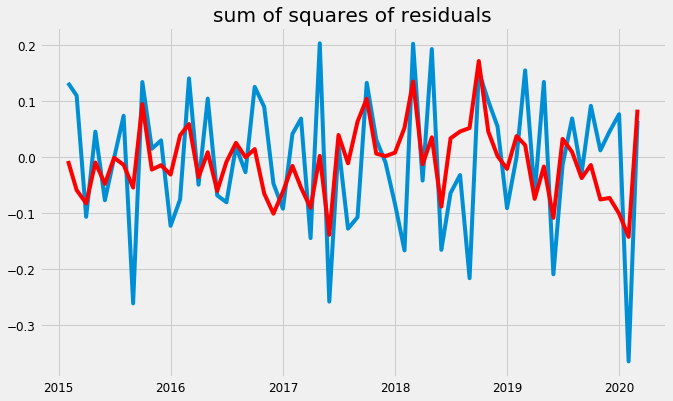

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(2,1,1))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Total waste"])**2))

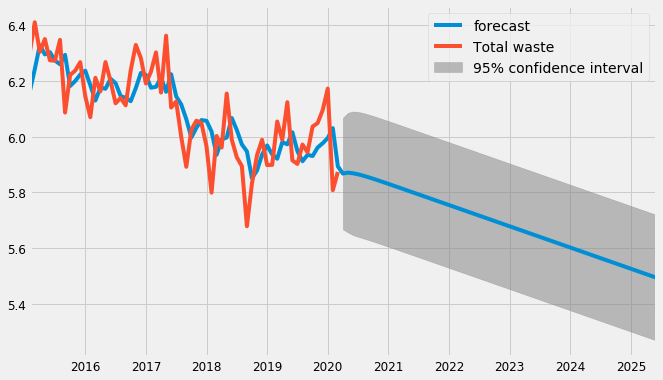

In [82]:
result_AR.plot_predict(1,125)
x=result_AR.forecast(steps=200)

In [84]:
res = result_AR.predict(1,125)

In [ ]:
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Volume', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df['date'], y=df['Total waste'], title='Total Amount of Waste Generated from 2015 to 2020 in City of Melbourne')

In [ ]:
df.dtypes

In [ ]:
sns.scatterplot(df['No of Events'][1:13],df['Total waste'][1:13])

In [ ]:
sns.scatterplot(df['No of Events'][13:25],df['Total waste'][13:25])

In [ ]:
sns.scatterplot(df['No of Events'][25:37],df['Total waste'][25:37])